In [ ]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from notebooks.code.utils import get_channels, load_channel, get_channel
     

channel = get_channel('ESA-Mission1', "channel_44")






Plotting channel_43 at (0, 0)
Plotting channel_44 at (0, 1)
Plotting channel_45 at (0, 2)
Plotting channel_46 at (0, 3)
Plotting channel_47 at (1, 0)
Plotting channel_48 at (1, 1)
Plotting channel_49 at (1, 2)
Plotting channel_50 at (1, 3)
Plotting channel_51 at (2, 0)


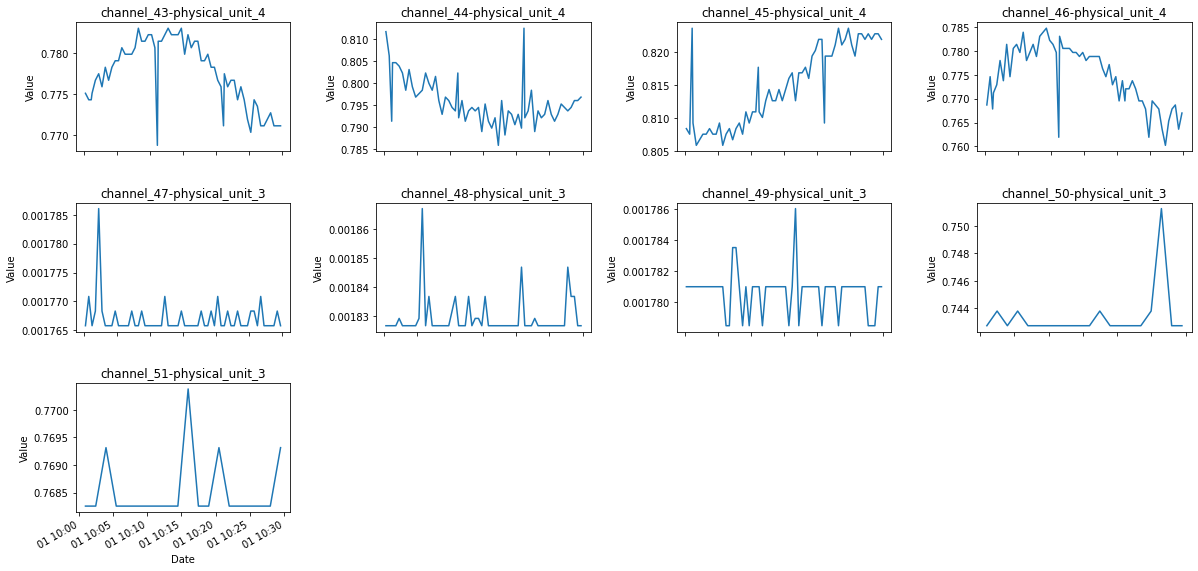

In [2]:
columns         = 4
mission         = 'ESA-Mission1'
channels        = get_channels(mission)
channels        = channels[42:51]


dt_from = '2000-01-01 10:00:00'
dt_to   = '2000-01-01 10:30:00'

fils = len(channels)//columns
fig = plt.figure(figsize=(20, 5*fils))
outer_grid = fig.add_gridspec(fils+1, columns, wspace=0.4, hspace=0.4)  
for channel, ne in zip(channels, range(len(channels))):
    #print(channel_name, j%columns)
    loaded_channel = load_channel(mission, channel)
    df = loaded_channel["data"]
    fdf = df[(df.index >= dt_from) & (df.index < dt_to)]
    
    j = ne%columns
    i = ne//columns
    print(f'Plotting {channel["Channel"]} at ({i}, {j})')
    ax = fig.add_subplot(outer_grid[i, j])
    ax.plot(fdf.index, fdf[channel["Channel"]], label=channel["Channel"])
    ax.set_title(channel["Channel"]+"-"+channel["Physical Unit"]) #ax.set_title(f'Plot ({i}, {j})')
    #inner_grid = outer_grid[i, j].subgridspec(2, 1, height_ratios=[3, 1])
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    fig.autofmt_xdate()

plt.show()
    